In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [35]:
mnist = tf.keras.datasets.mnist
(mnist_x_train, mnist_y_train) , (mnist_x_test, mnist_y_test) = mnist.load_data()
mnist_x_train = tf.keras.utils.normalize(mnist_x_train, axis = 1)
mnist_x_test = tf.keras.utils.normalize(mnist_x_test, axis = 1)

In [13]:
model = tf.keras.models.load_model('mnist_9917.model')
predictions = model.predict(mnist_x_test)

In [19]:
def wrong(data):
    counter = 0
    for i in range(len(data)):
        if np.argmax(predictions[i]) != data[i]:
            counter += 1
            plt.imshow(mnist_x_test[i], cmap = plt.cm.binary)
            plt.show()
            plt.close()
    print(counter)
    
def show_file(filepath):
    IMG_SIZE = 28
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    last_array = tf.keras.utils.normalize(new_array, axis = 1)
    plt.imshow(last_array, cmap='gray_r')

def prepare_file(filepath):
    IMG_SIZE = 28
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    last_array = tf.keras.utils.normalize(new_array, axis = 1)
    return last_array.reshape(-1, IMG_SIZE,IMG_SIZE)

def predict(filepath):
    show_file(filepath)
    prediction = model.predict([prepare_file(filepath)])
    print('The number you wrote is: ', np.argmax(prediction))

In [ ]:
wrong(mnist_y_test) # Counts and shows all the wrong numbers from mnist-test

The number you wrote is:  3


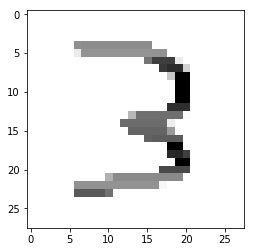

In [28]:
predict('number_3.png')

The number you wrote is:  7


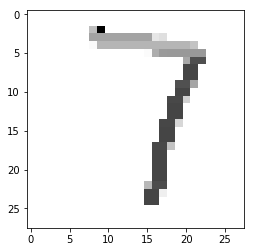

In [29]:
predict('number_7.png')

The number you wrote is:  4


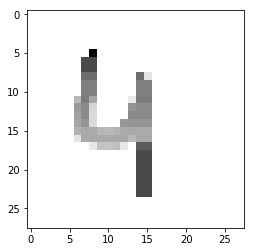

In [30]:
predict('number_4.png')